<a href="https://colab.research.google.com/github/spdr-lily/analise-e-manipulacao-de-dados-com-R/blob/main/manipulacao_de_dados_com_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação e manipulaçao de dados com R

In [1]:
# carregando pacotes
tidyverse <- library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# importanto um conjunto de dados csv de um link
url <- "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
data <- read.csv(url)

In [4]:
# exibindo primeiras linhas do dataset
print(head(data))

  Month X1958 X1959 X1960
1   JAN   340   360   417
2   FEB   318   342   391
3   MAR   362   406   419
4   APR   348   396   461
5   MAY   363   420   472
6   JUN   435   472   535


In [5]:
#manipulando dataset - criando uma nova coluna calculando a média de passageiros por mês
data <- data %>%
  mutate(Average_Passengers = rowMeans(select(., -Month)))

In [6]:
# exibindo o dataset manipulado
print(data)

   Month X1958 X1959 X1960 Average_Passengers
1    JAN   340   360   417           372.3333
2    FEB   318   342   391           350.3333
3    MAR   362   406   419           395.6667
4    APR   348   396   461           401.6667
5    MAY   363   420   472           418.3333
6    JUN   435   472   535           480.6667
7    JUL   491   548   622           553.6667
8    AUG   505   559   606           556.6667
9    SEP   404   463   508           458.3333
10   OCT   359   407   461           409.0000
11   NOV   310   362   390           354.0000
12   DEC   337   405   432           391.3333


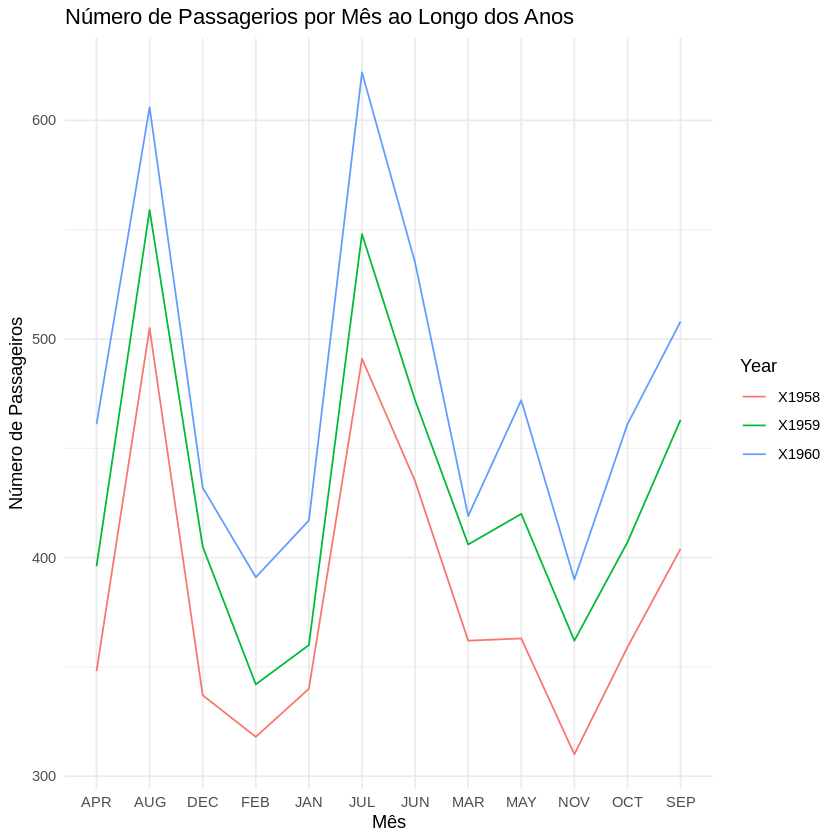

In [8]:
# visualização dos dados agrupados corretamente
data_long <- data %>%
  pivot_longer(cols = c('X1958','X1959','X1960'), names_to = "Year", values_to = "Passengers")
ggplot(data_long, aes(x = Month, y = Passengers, group = Year, color = Year)) + geom_line() +
  labs(title = "Número de Passagerios por Mês ao Longo dos Anos", x = "Mês", y = "Número de Passageiros") + theme_minimal()